## Analysis and Prediction on Game Sales

Project description:
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.

This project is broken down into many steps:
1) Preparation of the data: from the raw dataset, the data has to be initially studied and cleaned up to prepare for analysis. This includes checking for missing and duplicate values, fixing data types for columns, renaming columns, and fixing any issues observed with the data.

Reference for the data name and description:
- Name: title of the game
- Platform: what console the game is on
- Year_of_release: the game's release year
- Genre: the type of the game
- NA_sales: (North American sales in USD million)
- EU_sales: (Europe sales in USD million)
- JP_sales: (Japan sales in USD million)
- Other_sales: (all other countries sales in USD million)
- Critic_score: maximum of 100, professional reviewed scores
- User_score: maximum of 10, user reviewed scores
- Rating: ESRB rating

2) Analyze the data: identify trends from the data on sales

3) Hypothesis testing: evaluate any statistical significance on specific questions

4) Conclusions: overall predictions on where to focus efforts for 2017

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# Read dataset into df
df = pd.read_csv('games.csv')

## Prepare data
Initial look through data and preparation of the data for analysis

In [3]:
# Print out information on the data and first 5 rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Renaming columns to lower case
df.columns = df.columns.str.lower()

Do the data types match up for the columns?
- Need to take a look at 'year_of_release' - expect 'int' but is float type, possibly due to missing values
- 'user_score' should be float type, will need to be investigated and converted
- every other column data types looks as expected

In [5]:
# Investing 'year_of_release' column
df['year_of_release'].value_counts(dropna=False)

# 269 missing values, matches up with the total entries, float type is acceptable

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
NaN        269
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [6]:
# Checking 'user_score' unique values
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [7]:
# User_score contains 'tbd', remove and convert to numeric type
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [8]:
# Recheck df information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
# Details on duplicates and missing values
display(df.duplicated().agg(['sum', 'mean']))
display(df.isna().agg(['sum', 'mean']))

sum     0.0
mean    0.0
dtype: float64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
sum,2.00000,0.0,269.000000,2.00000,0.0,0.0,0.0,0.0,8578.000000,9125.000000,6766.000000
mean,0.00012,0.0,0.016093,0.00012,0.0,0.0,0.0,0.0,0.513192,0.545917,0.404786


Observations on missing values:
- Only 2 missing values for 'name' and 'genre' (accounts for 0.012% of the data), will take a look at these entries
- Large percentage missing for critic and user scores as well as rating. Not entirely unexpected as possibly these games haven't been reviewed or rated yet. Because the scores represent such a large percentage of the data, we should not attempt to fill in the missing values as that may affect the data and skew the analysis.
- Low percentage of missing year_of_release values that is not a significant amount, will keep the rows as information on sales can be useful here. 

In [10]:
# Investigate the missing 'name' and 'genre' rows
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


The missing name and genre are in the above entries. Because of other missing entries in score and rating, I think it is best to simply remove these rows from the dataset. Removing 2 entries also account for a very tiny percentage of the data, so it shouldn't affect the analysis.

In [11]:
# Removing the missing name and genre rows
df.dropna(subset='name', inplace=True)

In [12]:
# Investigate the rating columns to clean up missing values
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [13]:
# Replace EC to E
# Replace K-A to E
# Replace AO to M
df['rating'] = df['rating'].replace('EC', 'E')
df['rating'] = df['rating'].replace('K-A', 'E')
df['rating'] = df['rating'].replace('AO', 'M')

In [14]:
# Calculate global sales and add to dataframe
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [15]:
# Look back at the year_of_release column, sort by global_sales on missing year_of_release values
df.query("year_of_release.isna()").sort_values('global_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E,2.40
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+,2.33
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T,2.24
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,2.09


The idea here is to fill in the missing year_of_release values of the top significant games in terms of sales.

The fix is to manually look up the game with the same name from other platforms, and replace missing year_of_release with this info.

In [16]:
# Look at name on other platforms
display(df.query("name == 'Madden NFL 2004'"))
display(df.query("name == 'FIFA Soccer 2004'"))
display(df.query("name == 'LEGO Batman: The Videogame'"))
display(df.query("name == 'wwe Smackdown vs. Raw 2006'"))
display(df.query("name == 'Space Invaders'"))
display(df.query("name == 'Rock Band'"))
display(df[df['name'] == 'Frogger\'s Adventures: Temple of the Frog'])
display(df.query("name == 'LEGO Indiana Jones: The Original Adventures'"))
display(df.query("name == 'Call of Duty 3'"))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E,1.09
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E,0.51
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E,0.31


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E,0.78
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E,0.06
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E,0.05


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+,3.38
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+,3.06
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8.0,E10+,3.05
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+,1.30
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+,1.28
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+,1.27
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+,0.06


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN,3.0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN,0.46
8580,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN,0.16
10383,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN,0.11


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T,2.47
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T,2.09
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T,1.62
1840,Rock Band,PS2,NaN,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T,1.12


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,NaN,E,2.4


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
329,LEGO Indiana Jones: The Original Adventures,X360,2008.0,Action,2.40,1.01,0.0,0.36,77.0,7.5,E10+,3.77
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.0,0.21,78.0,6.6,E10+,2.33
743,LEGO Indiana Jones: The Original Adventures,DS,2008.0,Action,1.40,0.59,0.0,0.20,80.0,7.9,E,2.19
1408,LEGO Indiana Jones: The Original Adventures,PS2,2008.0,Action,0.60,0.01,0.0,0.76,77.0,8.4,E10+,1.37
1723,LEGO Indiana Jones: The Original Adventures,PSP,2008.0,Action,0.40,0.48,0.0,0.29,76.0,7.6,E10+,1.17
2013,LEGO Indiana Jones: The Original Adventures,PS3,2008.0,Action,0.44,0.42,0.0,0.17,77.0,7.7,E10+,1.03
13714,LEGO Indiana Jones: The Original Adventures,PC,2008.0,Action,0.02,0.02,0.0,0.00,78.0,7.7,E10+,0.04


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
557,Call of Duty 3,X360,2006.0,Shooter,1.49,0.92,0.02,0.27,82.0,6.5,T,2.70
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T,2.24
1255,Call of Duty 3,PS3,2006.0,Shooter,0.60,0.62,0.03,0.26,80.0,6.9,T,1.51
1915,Call of Duty 3,PS2,2006.0,Shooter,0.89,0.03,0.00,0.15,82.0,7.4,T,1.07


In [17]:
# Replace the missing year_of_release value based on same game on other platforms
df.loc[183, 'year_of_release'] = 2003 # Madden
df.loc[377, 'year_of_release'] = 2003 # FIFA
df.loc[456, 'year_of_release'] = 2008 # LEGO
df.loc[1538, 'year_of_release'] = 2008 # LEGO
df.loc[475, 'year_of_release'] = 2005 # WWE
df.loc[678, 'year_of_release'] = 2008 # LEGO
df.loc[719, 'year_of_release'] = 2006 # Call of Duty

It probably wasn't worth the trouble to manually fix the year_of_release as it will have a minor effect on the entire dataset. However, this is something to consider to possibly look up the game and find the information online and manually fix the missing release years. Considering the small percentage of missing year_of_release values though, it shouldn't affect much of our analysis for our purposes of identifying trends and planning for 2017.

In [18]:
# Print out details on the prepared dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16451 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  global_sales     16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 2.2+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Summary on the preparation of the dataset:

Changed column names to lowercase. Checked and updated data types appropriate for the columns. Checked for duplicates and missing values. Removed certain rows with missing 'name' and 'genre' entries. Added a global_sales column which is the sum of the sales in all regions for the particular game. Manually filled in some missing year_of_release values based on the same game from different platforms.

## Analysis of the dataset
From the prepared dataset, the goal is to address the following questions:

1) Look at how many games were released in different years. Is the data for every period significant?

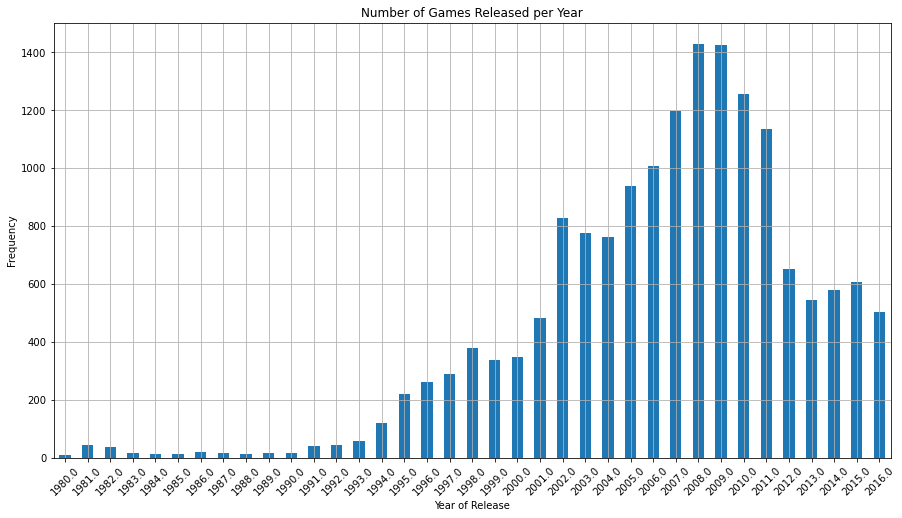

In [19]:
# Count number of games per year of release and plot as bar graph
year_games = df.groupby('year_of_release')['name'].count()

year_games.plot(kind='bar', figsize=(15, 8), rot=45, grid=True)
plt.xlabel('Year of Release')
plt.ylabel('Frequency')
plt.title('Number of Games Released per Year')
plt.show()

The distribution of the number of games released per year shows that the gaming industry really gets going starting in the 1990s with the most number of games released in 2008 and 2009. For our purposes in planning for the 2017 year, it would make sense that we look at the more recent years as these would be more significant and relevant. For example, data from games released in the 1980s would be irrelevant with developing a plan for 2017.

2) Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [20]:
# Global sales grouped by platform, ranked from highest to lowest total sales
plat_globsales = df.groupby('platform')['global_sales'].agg(['mean', 'sum']).reset_index().sort_values(by='sum', ascending=False)
display(plat_globsales.head(10))

,platform,mean,sum
16,PS2,0.581106,1255.77
28,X360,0.769746,971.42
17,PS3,0.705973,939.65
26,Wii,0.687508,907.51
4,DS,0.374765,806.12
15,PS,0.610576,730.86
6,GBA,0.386679,317.85
18,PS4,0.801378,314.14
19,PSP,0.243218,294.05
13,PC,0.266448,259.52


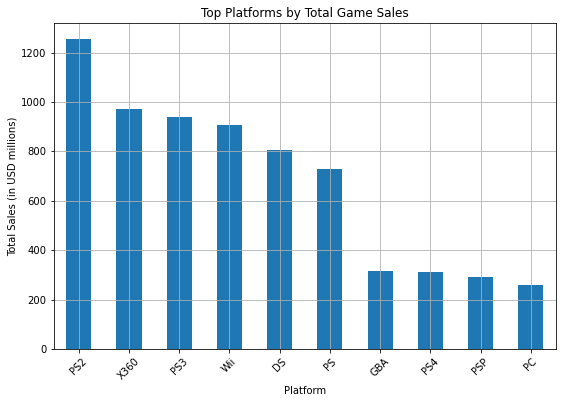

In [21]:
# Bar graph showing top 10 platforms by total global sales
plat_globsales.head(10).plot(kind='bar', x='platform', y='sum', figsize=(9, 6), legend=False, grid=True, rot=45)
plt.xlabel('Platform')
plt.ylabel('Total Sales (in USD millions)')
plt.title('Top Platforms by Total Game Sales')
plt.show()

Above bar graph shows the platforms with the most global sales combined for all games. Top 5 platforms by sales are PS2, X360, PS3, Wii, and DS in that order.

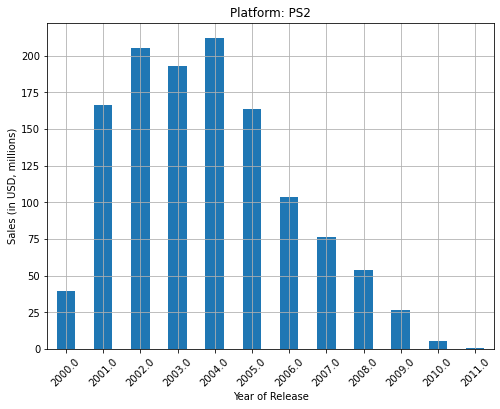

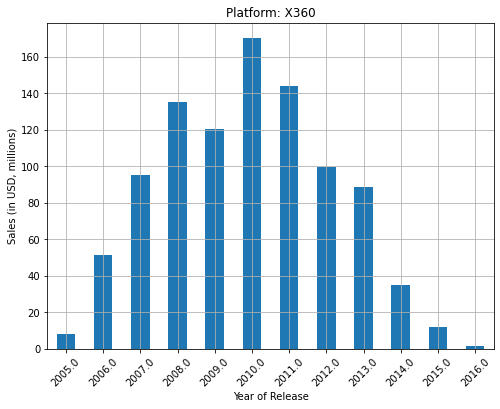

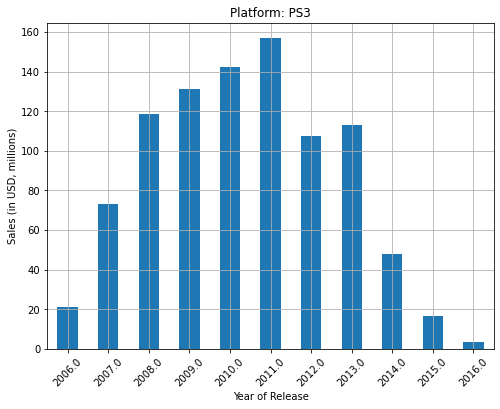

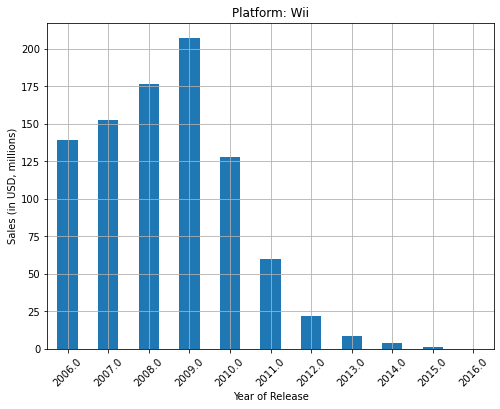

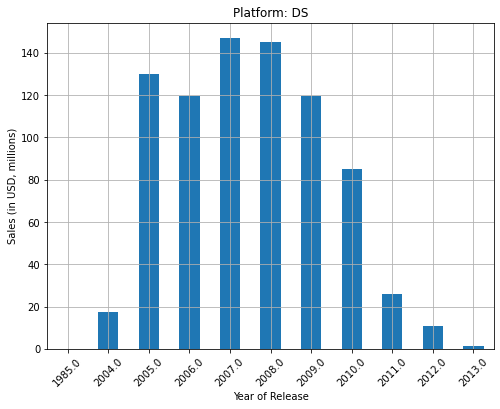

In [22]:
# Top 5 platforms by total sales
top5_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

# Generate bar graph for each platform by total sales and release year
for item in top5_platforms:
    df[df['platform'] == item].groupby('year_of_release')['global_sales'].agg('sum').plot(kind='bar', rot=45, figsize=(8,6), grid=True)
    plt.xlabel('Year of Release')
    plt.ylabel('Sales (in USD, millions)')
    plt.title(f'Platform: {item}')
    plt.show()

From the plots showing the greatest global sales by platform by year, it appears that the popularity of the platform generally follow the lifespan of the console. With the PS2, there is about a 5 year window from 2001 to 2005 where sales are at its highest and from 2006 onwards, there begins the decline in sales. This trend is similar with the other platforms. When comparing between the graphs, there appears to be about a 5-6 year window where sales are high and then declines. Back to the example with the PS2 platform, even though it has the highest total global sales, no more games are released after 2011 and thus no sales after 2011. 

Looking at this trend for platform, we can figure out a plan for 2017 by analyzing the data within a 7 year window from 2017. Data from years before 2010 will be disregarded and trends will be analyzed from games released from 2010 and onward to build a prognosis for 2017.

In [23]:
# Filter dataframe for games released 2010 and after
df_relevantyears = df.query("year_of_release >= 2010")
df_relevantyears.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5277 entries, 14 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5277 non-null   object 
 1   platform         5277 non-null   object 
 2   year_of_release  5277 non-null   float64
 3   genre            5277 non-null   object 
 4   na_sales         5277 non-null   float64
 5   eu_sales         5277 non-null   float64
 6   jp_sales         5277 non-null   float64
 7   other_sales      5277 non-null   float64
 8   critic_score     2312 non-null   float64
 9   user_score       2499 non-null   float64
 10  rating           3113 non-null   object 
 11  global_sales     5277 non-null   float64
dtypes: float64(8), object(4)
memory usage: 535.9+ KB


3. Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [24]:
# Determine global sales by platform on games released 2010 and after
plat_globalsales_rel = df_relevantyears.pivot_table(index='year_of_release', columns='platform', values='global_sales', aggfunc='sum')
display(plat_globalsales_rel)

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2010.0,NaN,85.02,24.28,5.64,142.17,NaN,35.04,NaN,127.95,NaN,170.03,NaN
2011.0,63.20,26.18,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN
2012.0,51.36,11.01,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013.0,56.57,1.54,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


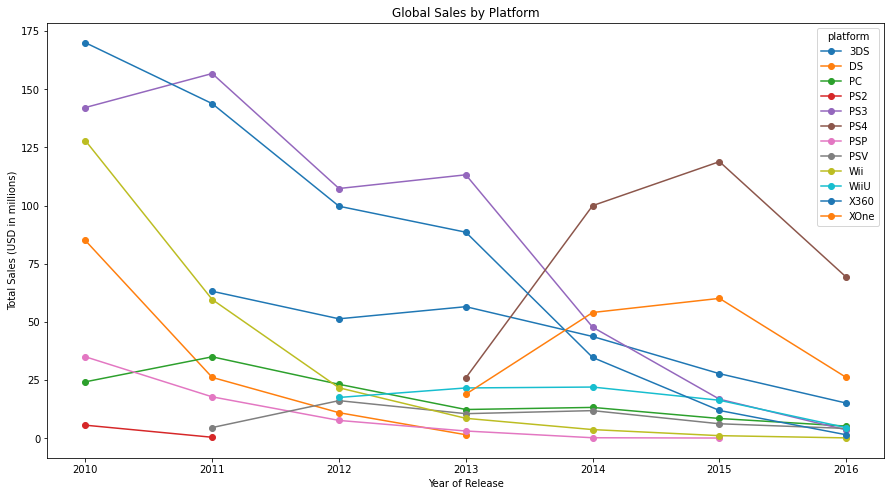

In [25]:
# Visualize data by line graph
plat_globalsales_rel.plot(kind='line', figsize=(15,8), rot=0, style='-o')
plt.ylabel('Total Sales (USD in millions)')
plt.xlabel('Year of Release')
plt.title('Global Sales by Platform')
plt.show()

Most platforms are on a downtrend leading up to 2016 with a couple of exceptions. PS2, DS, and PSP are examples where sales have declined to essentially 0 by 2015. Since 2016 data is incomplete, we can look at the trends leading up to 2015. The most recent consoles, Xbox One (XOne), and PS4 is trending upwards suggesting that these two are potentially going to be the most profitable platforms to look at when planning for 2017. In case we need to look at more platforms, there is rationale to include WiiU, PS3, and XBox 360 (X360). WiiU because it is a modern console, PS3 because it still has stronger sales relative to other declining platforms, and X360 because it came 3rd in total sales in 2015.

4) Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

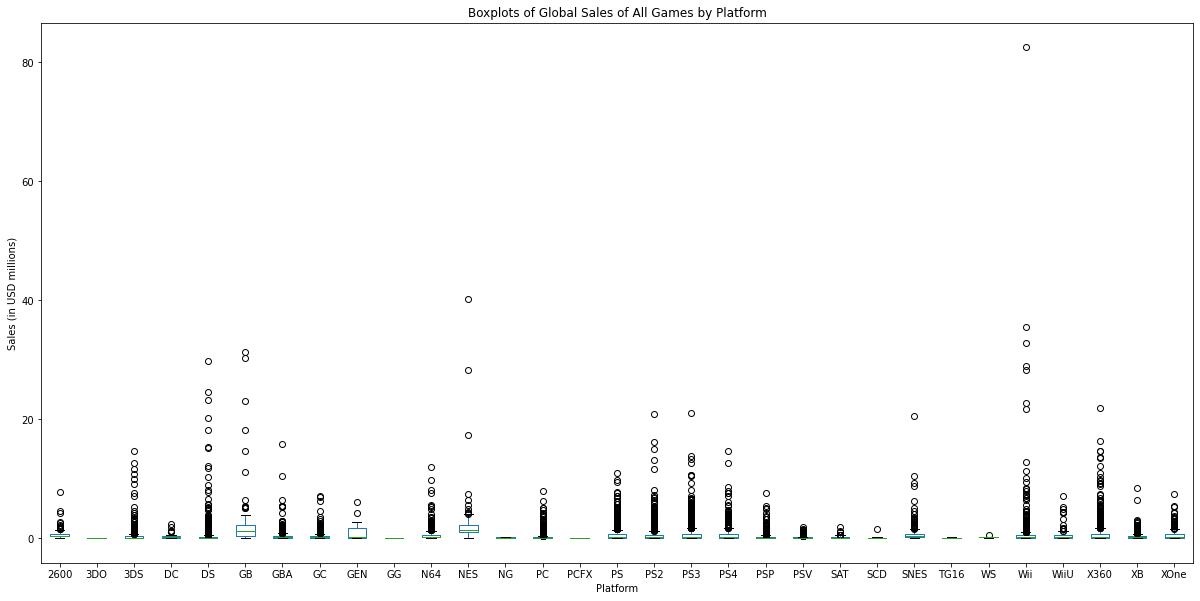

In [26]:
# Boxplot of global sales by platform
df.boxplot(column='global_sales', by='platform', figsize=(20,10), grid=False)
plt.suptitle('')
plt.xlabel('Platform')
plt.ylabel('Sales (in USD millions)')
plt.title('Boxplots of Global Sales of All Games by Platform')
plt.show()

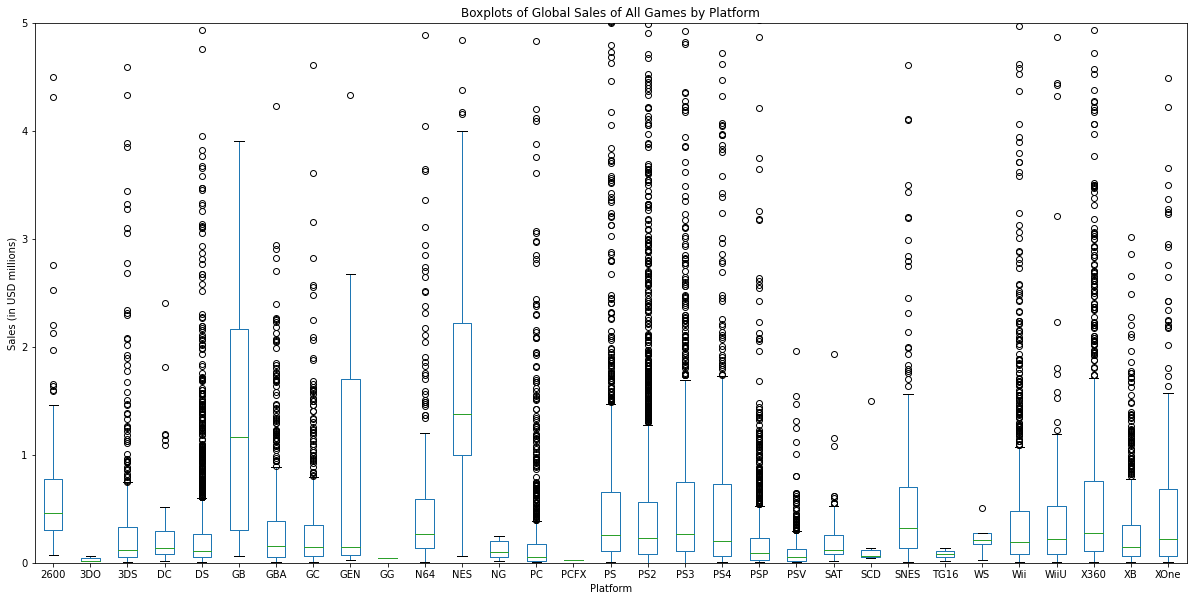

In [27]:
# Replot but change the y-axis scale
df.boxplot(column='global_sales', by='platform', figsize=(20,10), grid=False)
plt.suptitle('')
plt.ylim(0, 5)
plt.xlabel('Platform')
plt.ylabel('Sales (in USD millions)')
plt.title('Boxplots of Global Sales of All Games by Platform')
plt.show()

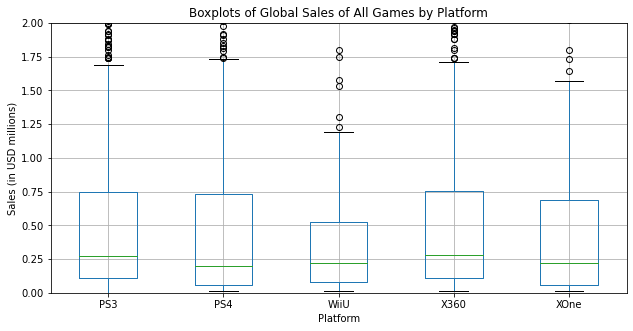

In [28]:
# Filtered boxplot based on the potentially profitable platforms
cols = ['PS4', 'XOne', 'WiiU', 'PS3', 'X360']
filtered_cols = df.query("platform in @cols")
filtered_cols.boxplot(column='global_sales', by='platform', figsize=(10, 5))
plt.suptitle('')
plt.ylim(0, 2)
plt.xlabel('Platform')
plt.ylabel('Sales (in USD millions)')
plt.title('Boxplots of Global Sales of All Games by Platform')
plt.show()

There are several interesting results when looking at the boxplots on global sales by platform. The amount of outliers in almost every platform shows that sales for a platform is mainly driven by the success of certain games. Out of all the games released on a platform, this suggests that a handful of games tends to be what drives sales for a platform. NES and GB stand out here as that on average per game released on these platforms outsell all other platforms, with a median total sales of over 1 million dollars. Underperformers we can clearly see with 3DO, GG, PCFX, SCD, and TG16.

When comparing the potentially profitable platforms for PS3, PS4, WiiU, X360 and XOne, the distribution of global sales looks fairly similar. The exception here is that WiiU sales look to be overall lower compared to the other platforms.

5) Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [29]:
# Sort by global sales of release years after 2010
df_relevantyears.groupby('platform')['global_sales'].agg('sum').sort_values(ascending=False)

platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
WiiU     82.19
PSP      64.05
PSV      53.81
PS2       6.09
Name: global_sales, dtype: float64

PS3 has the highest global sales from 2010 and after, so we'll focus on this platform during this timeframe.

In [30]:
# Filter by PS3 platform on timeframe from 2010 and after
df_PS3 = df_relevantyears.query("platform == 'PS3'")

In [31]:
df_PS3.info()
df_PS3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 16 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             889 non-null    object 
 1   platform         889 non-null    object 
 2   year_of_release  889 non-null    float64
 3   genre            889 non-null    object 
 4   na_sales         889 non-null    float64
 5   eu_sales         889 non-null    float64
 6   jp_sales         889 non-null    float64
 7   other_sales      889 non-null    float64
 8   critic_score     475 non-null    float64
 9   user_score       539 non-null    float64
 10  rating           593 non-null    object 
 11  global_sales     889 non-null    float64
dtypes: float64(8), object(4)
memory usage: 90.3+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010.0,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70


In [32]:
# Calculate the correlation between critic and user score with the total sales
PS3_critic_sales_corr = df_PS3['critic_score'].corr(df_PS3['global_sales'])
PS3_user_sales_corr = df_PS3['user_score'].corr(df_PS3['global_sales'])
print(f'Pearson correlation coefficient between critic score and global sales is: {PS3_critic_sales_corr}')
print(f'Pearson correlation coefficient between user score and global sales is: {PS3_user_sales_corr}')


Pearson correlation coefficient between critic score and global sales is: 0.4005940935202251
Pearson correlation coefficient between user score and global sales is: 0.06509241630476512


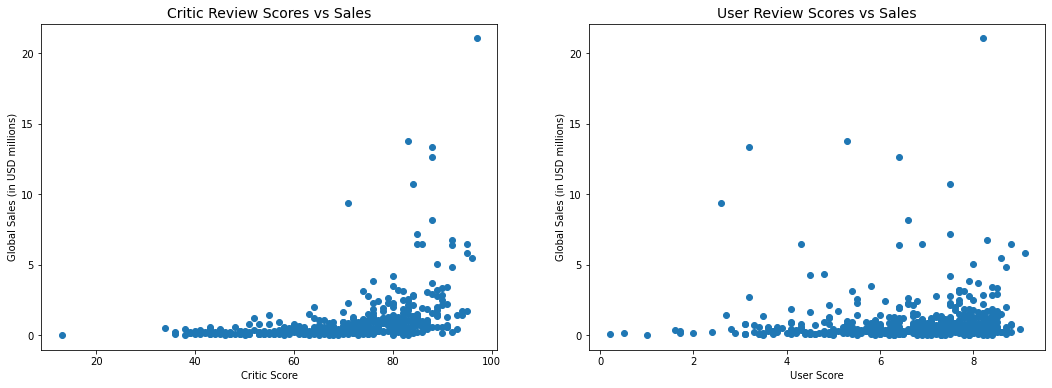

In [33]:
# Plotting critic_score and user_score against global sales
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

ax1.scatter(df_PS3['critic_score'], df_PS3['global_sales'])
ax1.set_xlabel('Critic Score')
ax1.set_ylabel('Global Sales (in USD millions)')
ax1.set_title('Critic Review Scores vs Sales', fontsize=14)

ax2.scatter(df_PS3['user_score'], df_PS3['global_sales'])
ax2.set_xlabel('User Score')
ax2.set_ylabel('Global Sales (in USD millions)')
ax2.set_title('User Review Scores vs Sales', fontsize=14)
plt.show()

In [34]:
# Sort by top global sales and look at missing values in critic or user score
df_PS3.sort_values(by='global_sales', ascending=False).head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010.0,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012.0,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
104,Battlefield 3,PS3,2011.0,Shooter,2.85,2.89,0.35,1.08,85.0,7.5,M,7.17
118,Uncharted 3: Drake's Deception,PS3,2011.0,Action,2.77,2.75,0.19,1.03,92.0,8.3,T,6.74
122,FIFA 12,PS3,2011.0,Sports,0.84,4.30,0.11,1.39,NaN,NaN,NaN,6.64


In [35]:
# Filter by X360 platform on timeframe from 2010 and after
df_X360 = df_relevantyears.query("platform == 'X360'")

In [36]:
# Calculate the correlation between critic and user score with the total sales
X360_critic_sales_corr = df_X360['critic_score'].corr(df_X360['global_sales'])
X360_user_sales_corr = df_X360['user_score'].corr(df_X360['global_sales'])
print(f'Pearson correlation coefficient between critic score and global sales is: {X360_critic_sales_corr}')
print(f'Pearson correlation coefficient between user score and global sales is: {X360_user_sales_corr}')

Pearson correlation coefficient between critic score and global sales is: 0.34006415813175395
Pearson correlation coefficient between user score and global sales is: 0.06603518173931959


The correlation coefficient between the critic score and global sales shows that there is a positive correlation in both examples of PS3 and X360 platforms. For PS3, the correlation coefficient between the professional critic review scores and global sales is 0.40, while the correlation coefficient between user reviewed scores and global sales is 0.065. For X360, we have 0.34 correlation coefficient in the professional reviews vs global sales, and 0.066 between user scores and global sales. This indicates that the professional critic scores have a better correlation on global sales than user reviewed scores, and that user scores have generally no correlation on sales.

It is difficult to visualize this positive correlation in the plots. One might consider that due to the significant number of missing critic and user scores, that results may be skewed. When looking at the top 20 of best sellers, we can see there are not that many missing user or critic scores, and likely that its not misrepresented. Even from this top 20 list, it appears that the top sellers generally have fairly high critic scores, while the user scores for these best sellers are ranging from as low as 2.6 to high scores in the 9's.

In conclusion, that dataset suggests that it would be better to use professional critic review scores to predict sales, as it has a better correlation on global sales over user reviewed scores.

6) Keeping your conclusions in mind, compare the sales of the same games on other platforms.

In [37]:
# Get game titles of the top 5 best sellers on PS3
top5_PS3 = df_PS3.sort_values(by='global_sales', ascending=False).reset_index().loc[0:4, 'name']
print(top5_PS3)

0                Grand Theft Auto V
1        Call of Duty: Black Ops II
2    Call of Duty: Modern Warfare 3
3           Call of Duty: Black Ops
4                    Gran Turismo 5
Name: name, dtype: object


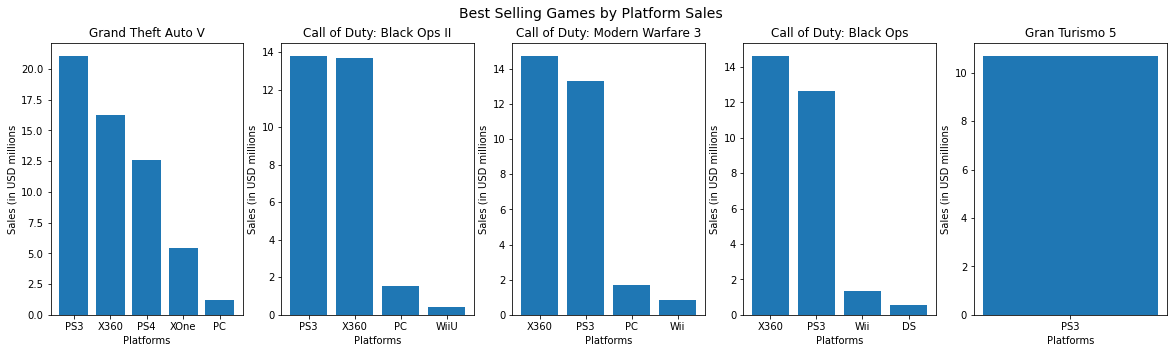

In [38]:
# Generate figures of top selling games by platforms
fig2, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, game in enumerate(top5_PS3):
    a = df_relevantyears.query(f"name == '{game}'")
    ax[i].bar(a['platform'], a['global_sales'])
    ax[i].set_ylabel('Sales (in USD millions')
    ax[i].set_title(game)
    ax[i].set_xlabel('Platforms')
plt.suptitle('Best Selling Games by Platform Sales', fontsize=14)
plt.show()

Top sellers in PS3 platform are usually complemented with good sales in the competing consoles as well with X360 and PS3. 

7) Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

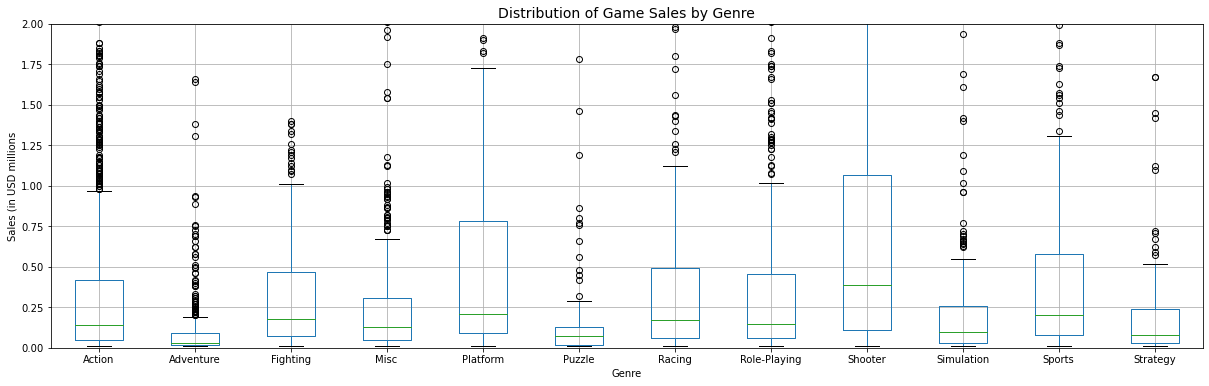

In [39]:
# Boxplots comparing affect of genre on global sales
df_relevantyears.boxplot(by='genre', column='global_sales', figsize=(20, 6))
plt.ylim(0, 2)
plt.xlabel('Genre')
plt.ylabel('Sales (in USD millions')
plt.suptitle('')
plt.title('Distribution of Game Sales by Genre', fontsize=14)
plt.show()

Looking at the boxplot distributions, Shooters and Platformers do better in sales on a per game average compared to the other genres. Also, Adventure and Puzzle games in general tend to not sell as well compared to the other genres.

genre
Shooter         1.170098
Platform        0.782484
Sports          0.571113
Role-Playing    0.555070
Racing          0.517637
Action          0.450227
Fighting        0.410000
Misc            0.407222
Simulation      0.330645
Strategy        0.210824
Puzzle          0.180702
Adventure       0.108348
Name: global_sales, dtype: float64

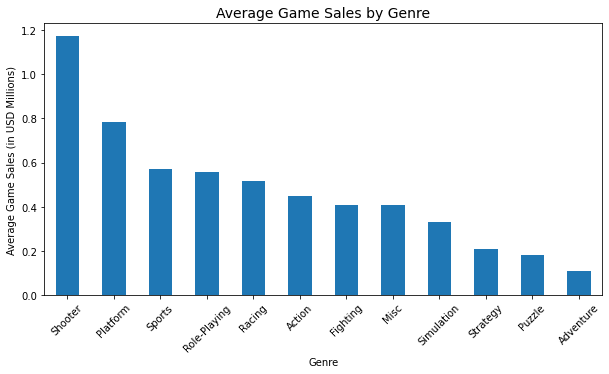

In [40]:
# Ranking and plotting the top average game sale by genre
display(df_relevantyears.groupby('genre')['global_sales'].agg('mean').sort_values(ascending=False))
df_relevantyears.groupby('genre')['global_sales'].agg('mean').sort_values(ascending=False).plot(kind='bar', rot=45, figsize=(10, 5))
plt.xlabel('Genre')
plt.ylabel('Average Game Sales (in USD Millions)')
plt.title('Average Game Sales by Genre', fontsize=14)
plt.show()

Top 5 for most profitable genres are in order of shooters, platformers, sports, role-playing, and racing games, while the least profitable are strategy, puzzle, and adventure games.

- For each region (NA, EU, JP), determine:

8) The top five platforms. Describe variations in their market shares from region to region.

In [41]:
# Rank top sales in each region by platform
df_na_region = df_relevantyears.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
df_eu_region = df_relevantyears.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
df_jp_region = df_relevantyears.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()

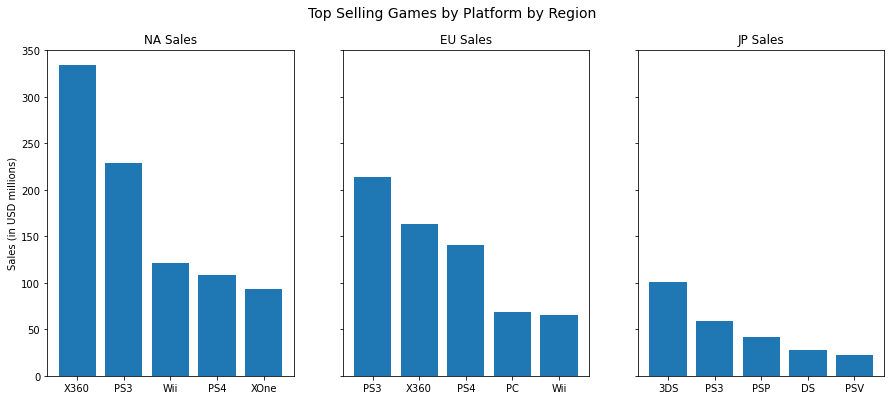

In [42]:
# Plot top 5 platforms per region in terms of sales
fig3, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), sharey=True)

ax[0].bar(df_na_region['platform'].head(), df_na_region['na_sales'].head())
ax[1].bar(df_eu_region['platform'].head(), df_eu_region['eu_sales'].head())
ax[2].bar(df_jp_region['platform'].head(), df_jp_region['jp_sales'].head())
ax[0].set_ylabel('Sales (in USD millions)')
ax[0].set_title('NA Sales')
ax[1].set_title('EU Sales')
ax[2].set_title('JP Sales')
plt.suptitle('Top Selling Games by Platform by Region', fontsize=14)
plt.show()

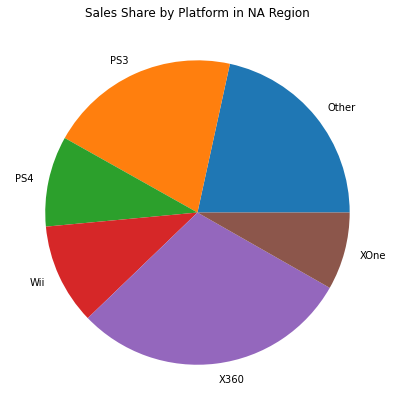

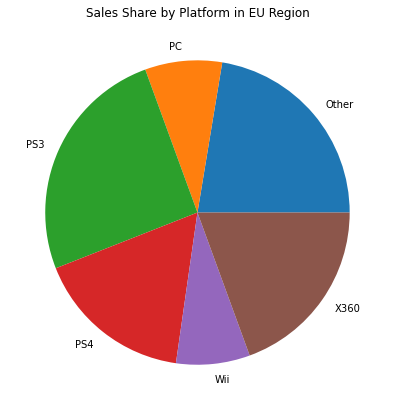

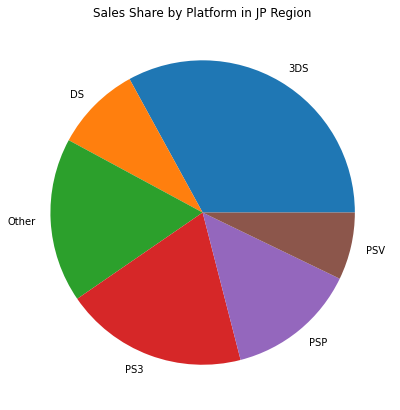

In [43]:
# Visualize sales share by pie chart in each region
top5_na = ['X360', 'PS3', 'Wii', 'PS4', 'XOne']
top5_eu = ['PS3', 'X360', 'PS4', 'PC', 'Wii']
top5_jp = ['3DS', 'PS3', 'PSP', 'DS', 'PSV']

df_na_region['platform'] = df_na_region['platform'].where(df_na_region['platform'].isin(top5_na), 'Other')
df_eu_region['platform'] = df_eu_region['platform'].where(df_eu_region['platform'].isin(top5_eu), 'Other')
df_jp_region['platform'] = df_jp_region['platform'].where(df_jp_region['platform'].isin(top5_jp), 'Other')

df_na_region.groupby('platform')['na_sales'].sum().plot(kind='pie', figsize=(7, 7))
plt.title('Sales Share by Platform in NA Region')
plt.ylabel('')
plt.show()
df_eu_region.groupby('platform')['eu_sales'].sum().plot(kind='pie', figsize=(7, 7))
plt.title('Sales Share by Platform in EU Region')
plt.ylabel('')
plt.show()
df_jp_region.groupby('platform')['jp_sales'].sum().plot(kind='pie', figsize=(7, 7))
plt.title('Sales Share by Platform in JP Region')
plt.ylabel('')
plt.show()

Top 5 platforms are similar between the NA and EU regions. Four out of five (X360, PS3, PS4, and Wii) are common best selling platform games in these two regions. JP has a different market as it appears that more handheld consoles are preferred in this region. This is confirmed when looking at the market share in the JP region, where the handhelds (3DS, DS, PSV, PSP) already make up well more than 50% of the total sales. This is opposite in the NA and EU region as handhelds are in the minority and at-home consoles are preferred.

- For each region (NA, EU, JP), determine:
9) The top five genres. Explain the difference.

In [44]:
# Rank top sales in each region by genre
df_na_genre = df_relevantyears.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
df_eu_genre = df_relevantyears.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
df_jp_genre = df_relevantyears.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()


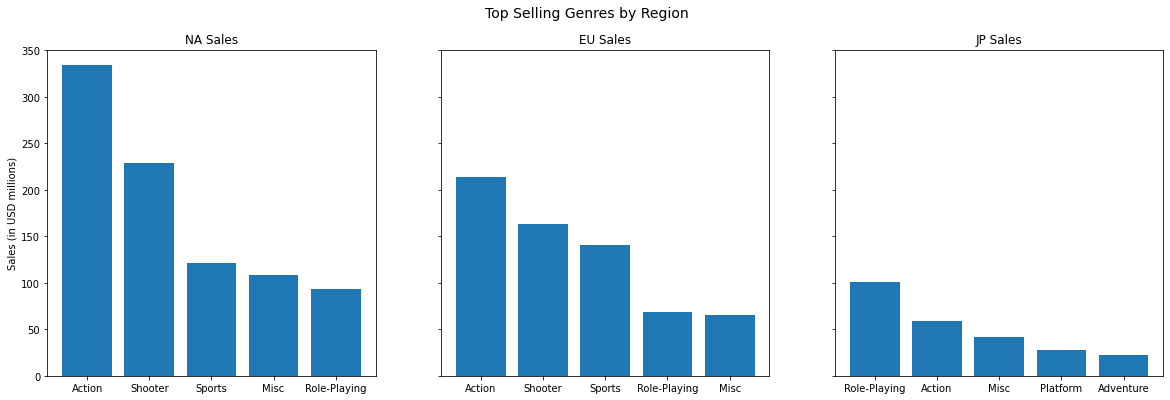

In [45]:
# Plot top 5 genres per region in terms of sales
fig4, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6), sharey=True)

ax[0].bar(df_na_genre['genre'].head(), df_na_region['na_sales'].head())
ax[1].bar(df_eu_genre['genre'].head(), df_eu_region['eu_sales'].head())
ax[2].bar(df_jp_genre['genre'].head(), df_jp_region['jp_sales'].head())
ax[0].set_ylabel('Sales (in USD millions)')
ax[0].set_title('NA Sales')
ax[1].set_title('EU Sales')
ax[2].set_title('JP Sales')
plt.suptitle('Top Selling Genres by Region', fontsize=14)
plt.show()

Top 5 selling genres are identical in both the NA and EU regions, while JP again has a different market interest. Role-playing games in JP dominates the sales, while action games are dominant in the NA and EU regions.

- For each region (NA, EU, JP), determine:
10) Do ESRB ratings affect sales in individual regions?

In [46]:
df_relevantyears['rating'].value_counts()

E       943
T       847
M       719
E10+    603
RP        1
Name: rating, dtype: int64

In [47]:
# To simplify analysis, remove the RP rating from the analysis
df_ratings_filt = df_relevantyears.query("rating != 'RP'")

In [48]:
# Display table of total and mean sales by ESRB rating
df_ratings_filt.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].agg(['sum', 'mean'])

na_sales           eu_sales           jp_sales          
            sum      mean      sum      mean      sum      mean
rating                                                         
E        272.28  0.288738   197.34  0.209268    47.87  0.050764
E10+     159.38  0.264312    99.28  0.164643    13.22  0.021924
M        382.22  0.531599   292.04  0.406175    30.45  0.042350
T        160.81  0.189858   113.08  0.133506    42.11  0.049717

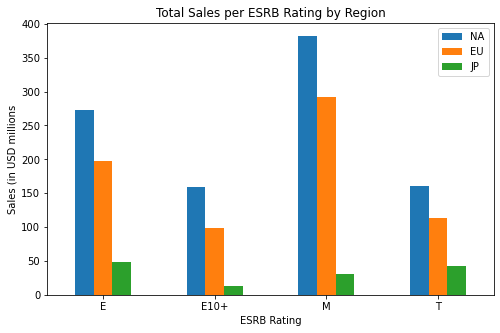

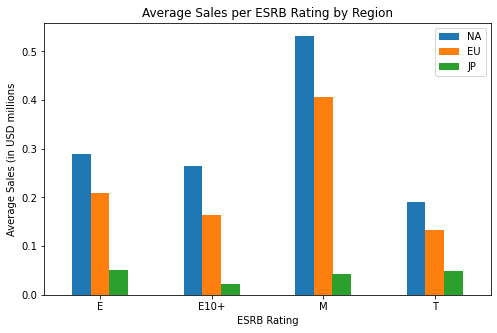

In [49]:
# Plot of total sales by ESRB rating and region
df_ratings_filt.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().plot(kind='bar', rot=0, figsize=(8, 5))
plt.xlabel('ESRB Rating')
plt.ylabel('Sales (in USD millions')
plt.title('Total Sales per ESRB Rating by Region')
plt.legend(['NA', 'EU', 'JP'])
plt.show()

# Plot of average game sales by ESRB rating and region
df_ratings_filt.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].mean().plot(kind='bar', rot=0, figsize=(8, 5))
plt.xlabel('ESRB Rating')
plt.ylabel('Average Sales (in USD millions')
plt.title('Average Sales per ESRB Rating by Region')
plt.legend(['NA', 'EU', 'JP'])
plt.show()

Most sales in the NA and EU regions include the M ratings, while most sales in the JP region are games with E ratings. One might have the expectation that the higher the restriction on a game (i.e. M rating) would limit sales, however this is not observed in the data, as more sales are coming from games with M ratings regardless of region.

## Hypothesis Testing

1) Compare the user ratings of Xbox One and PC platforms

Null hypothesis (H0): average user ratings on Xbox One is equal to the average user ratings on PC

Alternative hypothesis (Ha): average user ratings on Xbox One is NOT equal to the average user ratings on PC

In [50]:
# Filter by platform and get list of user scores
df_XOne_userratings = df_relevantyears.query("platform == 'XOne'")['user_score'].dropna()
df_PC_userratings = df_relevantyears.query("platform == 'PC'")['user_score'].dropna()

alpha = 0.05 # critical statistical significance level

# Perform the ttest
results = st.ttest_ind(df_XOne_userratings, df_PC_userratings)

print('p-value', results.pvalue)
if (results.pvalue < alpha):
    print("We can reject the null hypothesis.")
else:
    print("We cannot reject the null hypothesis.")
    

p-value 0.9809981106490319
We cannot reject the null hypothesis.


In [51]:
# Calculate mean and standard deviation of data set
XOne_mean = np.mean(df_XOne_userratings)
XOne_std = np.std(df_XOne_userratings)
PC_mean = np.mean(df_PC_userratings)
PC_std = np.std(df_PC_userratings)

print(f'XBox One average user score is: {XOne_mean:.3} with standard deviation: {XOne_std:.3}')
print(f'PC average user score is: {PC_mean:.3} with standard deviation: {PC_std:.3}')

XBox One average user score is: 6.52 with standard deviation: 1.38
PC average user score is: 6.52 with standard deviation: 1.56


With a very high p-value of 0.98, we cannot reject the null hypothesis and can state that the average user ratings of the Xbox One and PC are statistically not different from one another. This makes sense as the average user score for XBox One and PC is calculated to be identical at 6.52.

2) Compare the user ratings of Action and Sports genres

Null hypothesis (H0): average user ratings for Action games is equal to the average user ratings for Sports games

Alternative hypothesis (Ha): average user ratings for Action games is NOT equal to the average user ratings for Sports games

In [52]:
# Filter by genre and get list of user scores
df_action_userratings = df_relevantyears.query("genre == 'Action'")['user_score'].dropna()
df_sports_userratings = df_relevantyears.query("genre == 'Sports'")['user_score'].dropna()

alpha = 0.01 # critical statistical significance level

# Perform the ttest
results = st.ttest_ind(df_action_userratings, df_sports_userratings)

print('p-value', results.pvalue)
if (results.pvalue < alpha):
    print("We can reject the null hypothesis.")
else:
    print("We cannot reject the null hypothesis.")

p-value 7.839124224330309e-19
We can reject the null hypothesis.


In [53]:
# Calculate mean and standard deviation of data set
action_mean = np.mean(df_action_userratings)
action_std = np.std(df_action_userratings)
sports_mean = np.mean(df_sports_userratings)
sports_std = np.std(df_sports_userratings)

print(f'Action genre average user score is: {action_mean:.3} with standard deviation: {action_std:.3}')
print(f'Sports genre average user score is: {sports_mean:.3} with standard deviation: {sports_std:.3}')

Action genre average user score is: 6.78 with standard deviation: 1.36
Sports genre average user score is: 5.9 with standard deviation: 1.68


With a very low p-value of 7.8e-19, we can reject the null hypothesis and can say with high statistical significance that the average user ratings between the Action and Sports genre are different. The action genre has an average user score of 6.78, and the sports genre has an average user score of 5.9. 

## Conclusions

In planning for 2017, the focus of the campaign should be on modern platforms, with game genres including shooters, platformers, and sports, 'M' ESRB rated games, and highly scored professional critic reviews. Platforms typically have a lifespan of around 5-7 years, and it is best to focus on the most recent consoles, such as PS4 and XBox One to maximize sales, as these platforms have been trending upwards into 2016 and 2017. When looking at the type of games, generally shooters, platformers, and sports games have the highest average sales compared to other game genres. 'M' ESRB rated games have the highest sales in EU and NA regions and is second best in the JP region. In terms of reviews, higher professional critic scores tend to correlate with better sales, with user reviewed scores show to have little to no correlation to sales.

Here, I will describe the general process that went into analysis of the dataset. When plotting the top platform sales by year, it was evident that there are cycles of increasing and decreasing sales. This translated into about a lifespan of 5-7 years before sales went to 0. Because of this and the goal of the analysis to predict future trends, it was decided that data before 2010 was irrelevant to the analysis. From here, I broke down data of several variables and its effect on sales. These include the critic score, user score, genres, and ESRB ratings. In addition, sales were further separated into the different global regions and effects of the variables on the different regions were analyzed accordingly. Based from this analysis, there were clear trends that indicated what factors led to more sales and thus the conclusions that I described.